# 1. Загрузка набора данных

In [ ]:
#@title Загрузка датасета {display-mode:"form"}
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 9_laptops.csv to 9_laptops.csv
User uploaded file "9_laptops.csv" with length 103732 bytes


Создадим pandas DataFrame для работы с данными

In [ ]:
import pandas as pd

df = pd.read_csv(fn)

Выведем голову таблицы

In [ ]:
df.head()

,name,price_eur,display_cm,weight_kg,height_mm,width_mm,depth_mm,cpu_processor,ram_memory,gpu_integrated,internal_storage_gb,battery_life_h,battery_capacity_wh,psu_watts
0,"Apple MacBook Air M1 256GB, Space grau",912.99,33.8,1.29,16.1,304.1,212.4,M1,8.0,Apple GPU,256.0,18.0,49.9,30.0
1,MSI Stealth 17 Studio A13VI-013 - Intel Core i...,4680.23,43.9,2.80,20.1,397.6,283.5,i9-13900H,64.0,Intel Iris Xe Graphics,4.0,NaN,99.0,240.0
2,MSI Summit E14 FlipEvo A12MT-049 i7-1260P/16GB...,1651.12,35.6,1.60,17.9,314.0,227.5,i7-1260P,16.0,Intel Iris Xe Graphics,1000.0,NaN,72.0,65.0
3,Gigabyte GBT AORUS 15 9KF-E3DE383SH i5 W11 144Hz,1087.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fujitsu Lifebook A3511 FHD i3-1115G4 8GB 256GB...,354.97,39.6,1.95,23.9,361.0,244.0,i3-1115G4,8.0,Intel® UHD Graphics,256.0,NaN,45.0,NaN


Набор данных представляет собой информацию о различных ноутбуках

Выведем информацию о наборе данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 764 non-null    object 
 1   price_eur            764 non-null    float64
 2   display_cm           628 non-null    float64
 3   weight_kg            616 non-null    float64
 4   height_mm            627 non-null    float64
 5   width_mm             627 non-null    float64
 6   depth_mm             627 non-null    float64
 7   cpu_processor        628 non-null    object 
 8   ram_memory           627 non-null    float64
 9   gpu_integrated       617 non-null    object 
 10  internal_storage_gb  618 non-null    float64
 11  battery_life_h       210 non-null    float64
 12  battery_capacity_wh  580 non-null    float64
 13  psu_watts            576 non-null    float64
dtypes: float64(11), object(3)
memory usage: 83.7+ KB


В наборе данных есть как числовые, так и категориальные признаки

In [ ]:
#@title Описание параметров {display-mode:"form"}
params_dict = {}
for column in df.columns:
    params_dict[column] = [str(df[column].dtype)]

params_dict['name'].append('Название ноутбука')
params_dict['price_eur'].append('Цена ноутбука в евро')
params_dict['display_cm'].append('Размер диагонали дисплея в сантиметрах')
params_dict['weight_kg'].append('Вес ноутбука в килограммах')
params_dict['height_mm'].append('Высота ноутбука в миллиметрах')
params_dict['width_mm'].append('Ширина ноутбука в миллиметрах')
params_dict['depth_mm'].append('Глубина ноутбука в миллиметрах')
params_dict['cpu_processor'].append('Процессор')
params_dict['ram_memory'].append('Объем оперативной памяти в гигабайтах')
params_dict['gpu_integrated'].append('Название встроенного графического процессора')
params_dict['internal_storage_gb'].append(' Объем встроенного накопителя (жесткого диска или SSD) в гигабайтах')
params_dict['battery_life_h'].append('Продолжительность работы от батареи в часах')
params_dict['battery_capacity_wh'].append('Ёмкость батареи в ватт-часах')
params_dict['psu_watts'].append('Мощность блока питания в ваттах')

print(f"""
Количество записей: {df.shape[0]}
Количество параметров: {df.shape[1]}

""")

print('ОПИСАНИЕ ПАРАМЕТРОВ')
for param, description in params_dict.items():
  print(f"{param}: {description[0]}: {description[1]}")


Количество записей: 764
Количество параметров: 14


ОПИСАНИЕ ПАРАМЕТРОВ
name: object: Название ноутбука
price_eur: float64: Цена ноутбука в евро
display_cm: float64: Размер диагонали дисплея в сантиметрах
weight_kg: float64: Вес ноутбука в килограммах
height_mm: float64: Высота ноутбука в миллиметрах
width_mm: float64: Ширина ноутбука в миллиметрах
depth_mm: float64: Глубина ноутбука в миллиметрах
cpu_processor: object: Процессор
ram_memory: float64: Объем оперативной памяти в гигабайтах
gpu_integrated: object: Название встроенного графического процессора
internal_storage_gb: float64:  Объем встроенного накопителя (жесткого диска или SSD) в гигабайтах
battery_life_h: float64: Продолжительность работы от батареи в часах
battery_capacity_wh: float64: Ёмкость батареи в ватт-часах
psu_watts: float64: Мощность блока питания в ваттах


# 2. Подготовка набора данных

## а) Перемешать наборы

In [ ]:
df = df.sample(frac=1)

## б) Проверка на пропуски

Выведем количество пропусков в каждом столбце

In [ ]:
df.isna().sum()

name                     0
price_eur                0
display_cm             136
weight_kg              148
height_mm              137
width_mm               137
depth_mm               137
cpu_processor          136
ram_memory             137
gpu_integrated         147
internal_storage_gb    146
battery_life_h         554
battery_capacity_wh    184
psu_watts              188
dtype: int64

Удалим пропуски

In [ ]:
df_1 = df.dropna()

In [ ]:
df_1.isna().sum()

name                   0
price_eur              0
display_cm             0
weight_kg              0
height_mm              0
width_mm               0
depth_mm               0
cpu_processor          0
ram_memory             0
gpu_integrated         0
internal_storage_gb    0
battery_life_h         0
battery_capacity_wh    0
psu_watts              0
dtype: int64

Пропуски удалились

In [ ]:
print(f"Было: {df.shape}\nСтало: {df_1.shape}")

Было: (764, 14)
Стало: (166, 14)


Слишком сильно уменьшился набор данных

Заполним пропуски средними значениями

In [ ]:
df_2 = df.fillna(df.mean())
df_2.isna().sum()

<ipython-input-11-b21284681013>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_2 = df.fillna(df.mean())


name                     0
price_eur                0
display_cm               0
weight_kg                0
height_mm                0
width_mm                 0
depth_mm                 0
cpu_processor          136
ram_memory               0
gpu_integrated         147
internal_storage_gb      0
battery_life_h           0
battery_capacity_wh      0
psu_watts                0
dtype: int64

У категориальных признаков пропуски не заполнились, удалим их

In [ ]:
df_3 = df_2.dropna()
df_3.isna().sum()

name                   0
price_eur              0
display_cm             0
weight_kg              0
height_mm              0
width_mm               0
depth_mm               0
cpu_processor          0
ram_memory             0
gpu_integrated         0
internal_storage_gb    0
battery_life_h         0
battery_capacity_wh    0
psu_watts              0
dtype: int64

Пропуски были удалены

In [ ]:
print(f"Было: {df.shape}\nСтало: {df_3.shape}")

Было: (764, 14)
Стало: (617, 14)


Объем данных пострадал не сильно

## в) Анализ числовых и категориальных признаков

In [ ]:
df_3

,name,price_eur,display_cm,weight_kg,height_mm,width_mm,depth_mm,cpu_processor,ram_memory,gpu_integrated,internal_storage_gb,battery_life_h,battery_capacity_wh,psu_watts
624,Fujitsu LIFEBOOK U5313X WUXGA touch i5 W11P,1168.99,33.8,1.320000,19.20,304.8,217.8,i5-1335U,16.0,Intel Iris Xe Graphics,256.0,12.749,64.000000,65.000000
744,Microsoft Surface Laptop Studio i7 32GB 2TB 24...,3655.28,36.6,1.820000,18.90,323.3,228.3,i7-11370H,32.0,Intel Iris Xe Graphics,2000.0,18.000,58.000000,102.000000
433,Terra Mobile 1716T i3-1115G4 W11,699.00,43.9,2.400000,24.80,400.0,268.0,i3-1115G4,8.0,Intel® UHD Graphics,500.0,6.000,60.913534,88.184028
64,Fujitsu LIFEBOOK U7613 WUXGA 16 touch i7 W11P,2106.42,40.6,1.450000,20.90,357.0,249.3,i7-1370P,32.0,Intel Iris Xe Graphics,1.0,11.500,65.000000,65.000000
277,Microsoft Notebook Surface Laptop 5 - i7/16GB/...,1650.07,38.1,1.560000,14.70,340.0,244.0,i7-1265U,16.0,Intel Iris Xe Graphics,512.0,17.000,47.400000,65.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,Fujitsu Lifebook U7613 WUXGA 16 i5 W11P,1585.99,40.6,1.450000,20.90,357.0,249.3,i5-1335U,16.0,Intel Iris Xe Graphics,1.0,11.500,65.000000,65.000000
274,"Fujitsu LIFEBOOK U7312 Intel Core i5-1235U 33,...",1614.02,33.8,26.080341,18.90,308.0,199.5,i5-1235U,16.0,Intel Iris Xe Graphics,512.0,12.749,60.000000,65.000000
473,Fujitsu Lifebook U7313 FHD i7-1355U 16GB 1TBSS...,1614.28,33.8,990.000000,18.90,308.0,199.5,i7-1355U,16.0,Intel Iris Xe Graphics,1.0,12.500,60.000000,65.000000
165,"Lenovo ThinkPad X1 Yoga G7 14"" i7-1255U 16/512...",2075.68,35.6,1.380000,15.50,314.4,222.3,Intel SoC,16.0,Intel Iris Xe Graphics,512.0,12.749,57.000000,65.000000


from matplotlib import pyplot as plt
df_3['price_eur'].plot(kind='hist', bins=20, title='price_eur')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_3['display_cm'].plot(kind='hist', bins=20, title='display_cm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_3['weight_kg'].plot(kind='hist', bins=20, title='weight_kg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_3['height_mm'].plot(kind='hist', bins=20, title='height_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_3.plot(kind='scatter', x='price_eur', y='display_cm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_3.plot(kind='scatter', x='display_cm', y='weight_kg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_3.plot(kind='scatter', x='weight_kg', y='height_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_3.plot(kind='scatter', x='height_mm', y='width_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_3['price_eur'].plot(kind='line', figsize=(8, 4), title='price_eur')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_3['display_cm'].plot(kind='line', figsize=(8, 4), title='display_cm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_3['weight_kg'].plot(kind='line', figsize=(8, 4), title='weight_kg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_3['height_mm'].plot(kind='line', figsize=(8, 4), title='height_mm')
plt.gca().spines[['top', 'right']].set_visible(False)

вставить выводы

## г) Выбросы

### До обработки

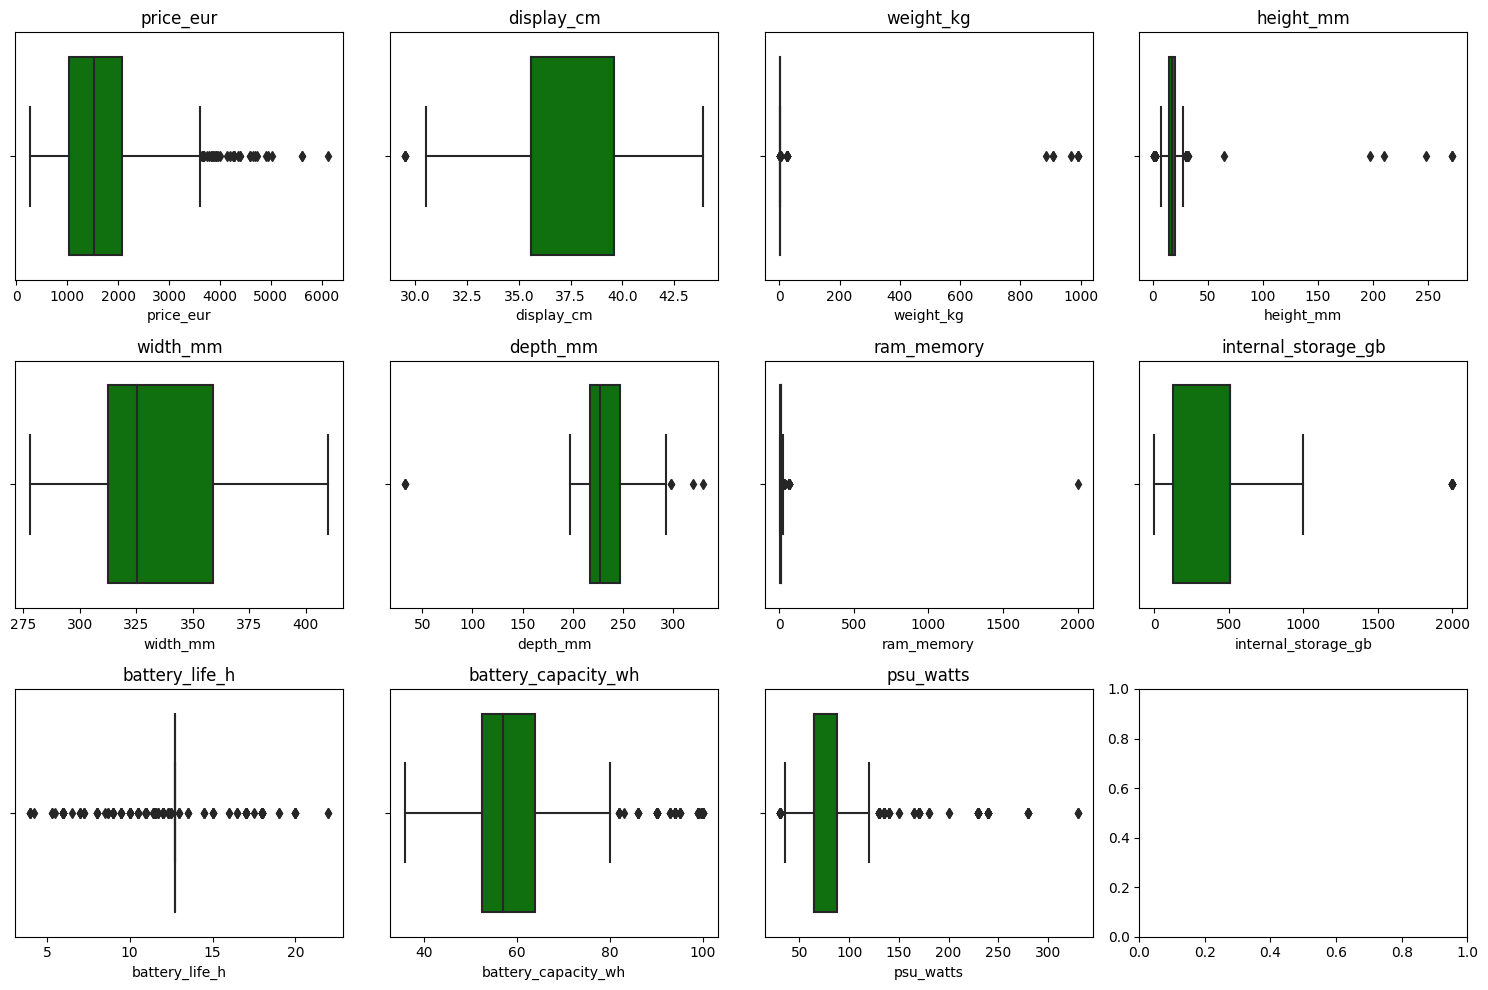

In [ ]:
#@title boxplots {display-mode:"form"}
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df_3.drop(['cpu_processor', 'gpu_integrated'], axis=1).select_dtypes(include=['number'])

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(numeric_columns.columns):
  sns.boxplot(x=column, data=numeric_columns, ax=axes[i], color="green")
  axes[i].set_title(column)

plt.tight_layout()
plt.show()

### Обработка

<Axes: >

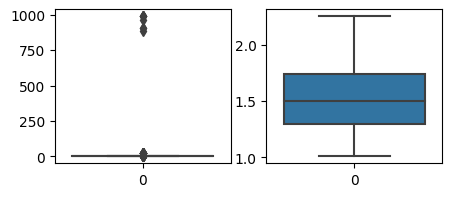

In [ ]:
df_4 = df_3.copy()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 2))
sns.boxplot(df_4['weight_kg'], ax=axes[0])
df_4 = df_4.loc[df_4['weight_kg'] <= 2.25]
sns.boxplot(df_4['weight_kg'], ax=axes[1])

<Axes: >

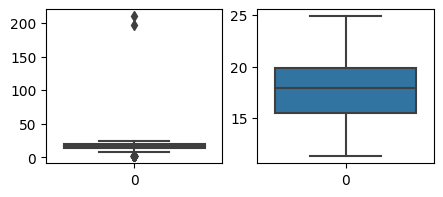

In [ ]:
df_5 = df_4.copy()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 2))
sns.boxplot(df_5['height_mm'], ax=axes[0])
df_5 = df_5.loc[df_5['height_mm'] <= 30]
df_5 = df_5.loc[df_5['height_mm'] >= 9]
sns.boxplot(df_5['height_mm'], ax=axes[1])

<Axes: >

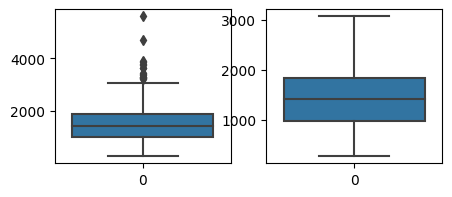

In [ ]:
df_6 = df_5.copy()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 2))
sns.boxplot(df_6['price_eur'], ax=axes[0])
df_6 = df_6.loc[df_6['price_eur'] <= 3200]
sns.boxplot(df_6['price_eur'], ax=axes[1])

<Axes: >

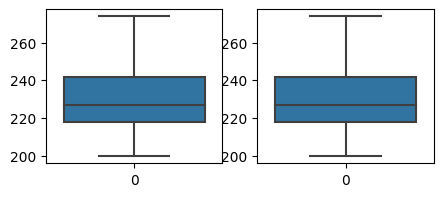

In [ ]:
df_7 = df_6.copy()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 2))
sns.boxplot(df_7['depth_mm'], ax=axes[0])
df_7 = df_7.loc[df_7['depth_mm'] <= 280]
sns.boxplot(df_7['depth_mm'], ax=axes[1])

<Axes: >

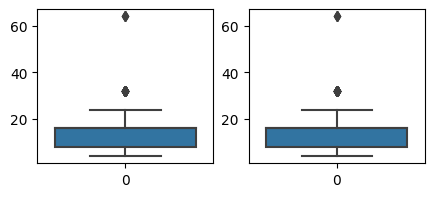

In [ ]:
df_8 = df_7.copy()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 2))
sns.boxplot(df_8['ram_memory'], ax=axes[0])
df_8 = df_8.loc[df_8['ram_memory'] <= 1000]
sns.boxplot(df_8['ram_memory'], ax=axes[1])

<Axes: >

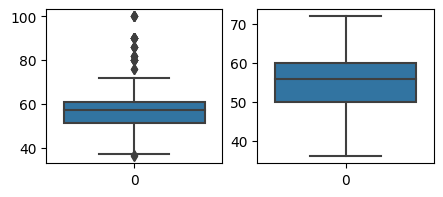

In [ ]:
df_9 = df_8.copy()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 2))
sns.boxplot(df_9['battery_capacity_wh'], ax=axes[0])
df_9 = df_9.loc[df_9['battery_capacity_wh'] <= 75]
sns.boxplot(df_9['battery_capacity_wh'], ax=axes[1])

<Axes: >

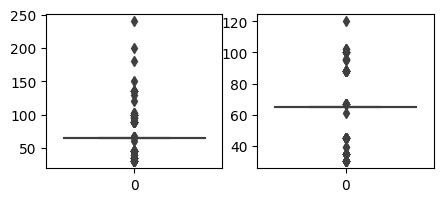

In [ ]:
df_10 = df_9.copy()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 2))
sns.boxplot(df_10['psu_watts'], ax=axes[0])
df_10 = df_10.loc[df_10['psu_watts'] <= 120]
sns.boxplot(df_10['psu_watts'], ax=axes[1])

### После обработки

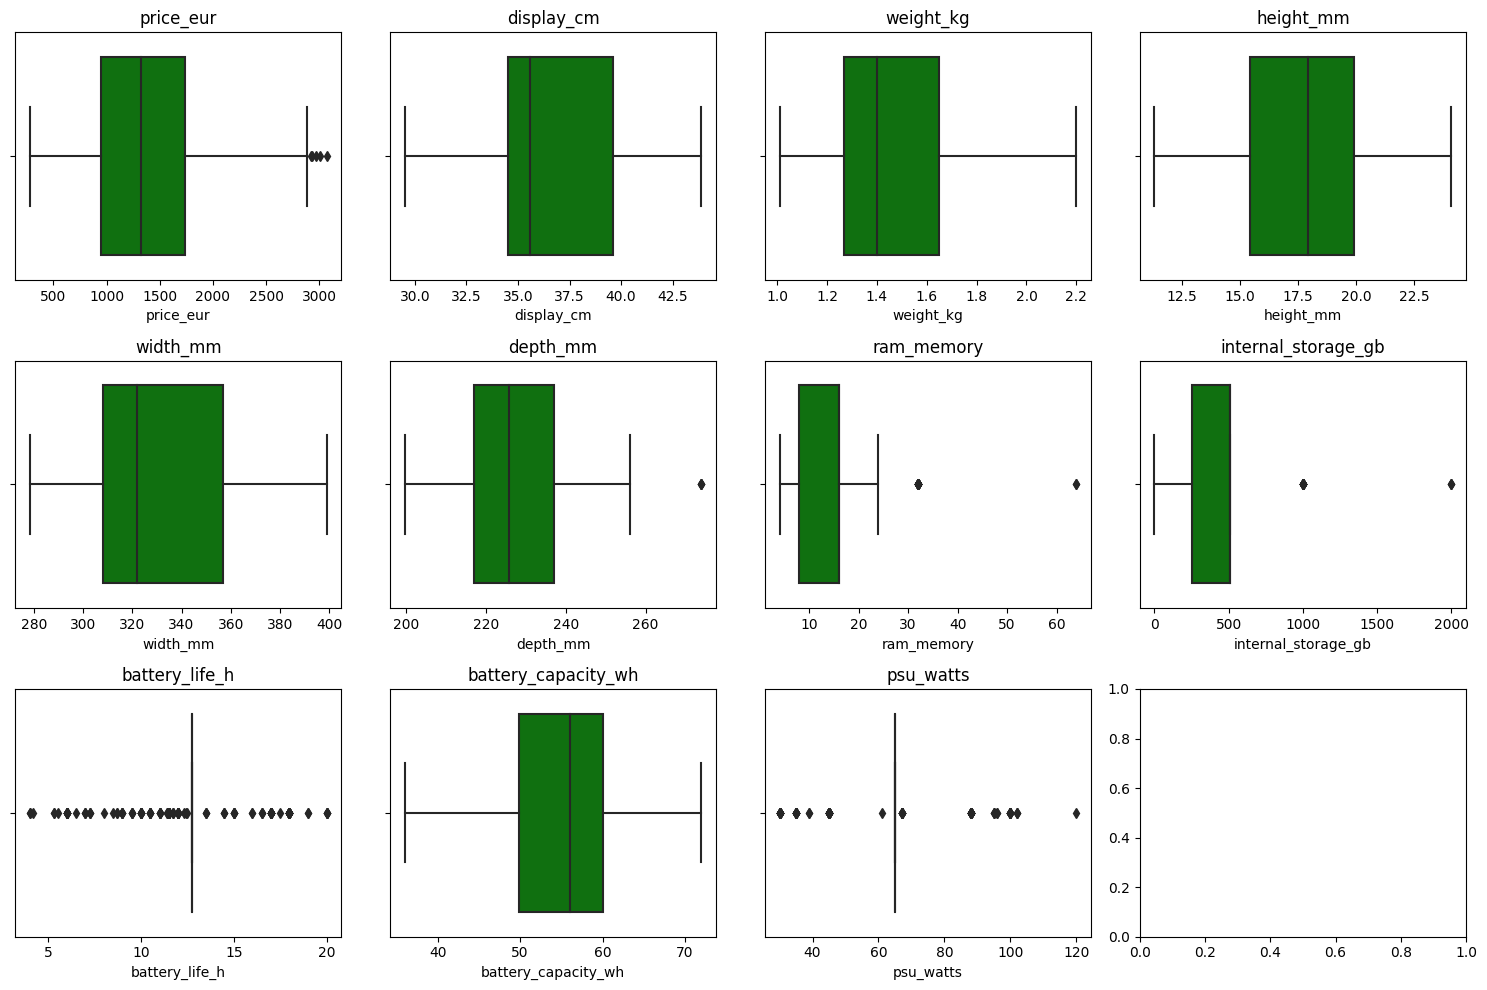

In [ ]:
#@title boxplots после обработки выбросов {display-mode:"form"}
import matplotlib.pyplot as plt
import seaborn as sns

df_to_plot = df_10

numeric_columns = df_to_plot.drop(['cpu_processor', 'gpu_integrated'], axis=1).select_dtypes(include=['number'])

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(numeric_columns.columns):
  sns.boxplot(x=column, data=numeric_columns, ax=axes[i], color="green")
  axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
df_3.shape

(617, 14)

In [ ]:
df_10.shape

(403, 14)

## г) Матрица корелляции

In [ ]:
corr_matrix = df_10.corr()
corr_matrix

<ipython-input-27-a89b84c4018a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_10.corr()


,price_eur,display_cm,weight_kg,height_mm,width_mm,depth_mm,ram_memory,internal_storage_gb,battery_life_h,battery_capacity_wh,psu_watts
price_eur,1.000000,-0.165477,-0.387886,-0.478494,-0.302527,-0.132362,0.616514,0.188920,0.330421,0.186507,0.124243
display_cm,-0.165477,1.000000,0.780462,0.421231,0.944892,0.846297,0.024576,0.050394,-0.319198,0.157059,0.273683
weight_kg,-0.387886,0.780462,1.000000,0.597842,0.804209,0.758189,-0.095127,0.079055,-0.321627,0.071600,0.291255
height_mm,-0.478494,0.421231,0.597842,1.000000,0.543386,0.437761,-0.020275,-0.090911,-0.366184,0.105892,0.421637
width_mm,-0.302527,0.944892,0.804209,0.543386,1.000000,0.831615,-0.044867,0.012536,-0.372270,0.127832,0.283624
depth_mm,-0.132362,0.846297,0.758189,0.437761,0.831615,1.000000,0.016722,-0.002010,-0.237241,-0.023563,0.258648
ram_memory,0.616514,0.024576,-0.095127,-0.020275,-0.044867,0.016722,1.000000,0.043796,0.084805,0.102566,0.284723
internal_storage_gb,0.188920,0.050394,0.079055,-0.090911,0.012536,-0.002010,0.043796,1.000000,0.040073,0.136696,0.141164
battery_life_h,0.330421,-0.319198,-0.321627,-0.366184,-0.372270,-0.237241,0.084805,0.040073,1.000000,-0.017582,-0.016543
battery_capacity_wh,0.186507,0.157059,0.071600,0.105892,0.127832,-0.023563,0.102566,0.136696,-0.017582,1.000000,0.262195


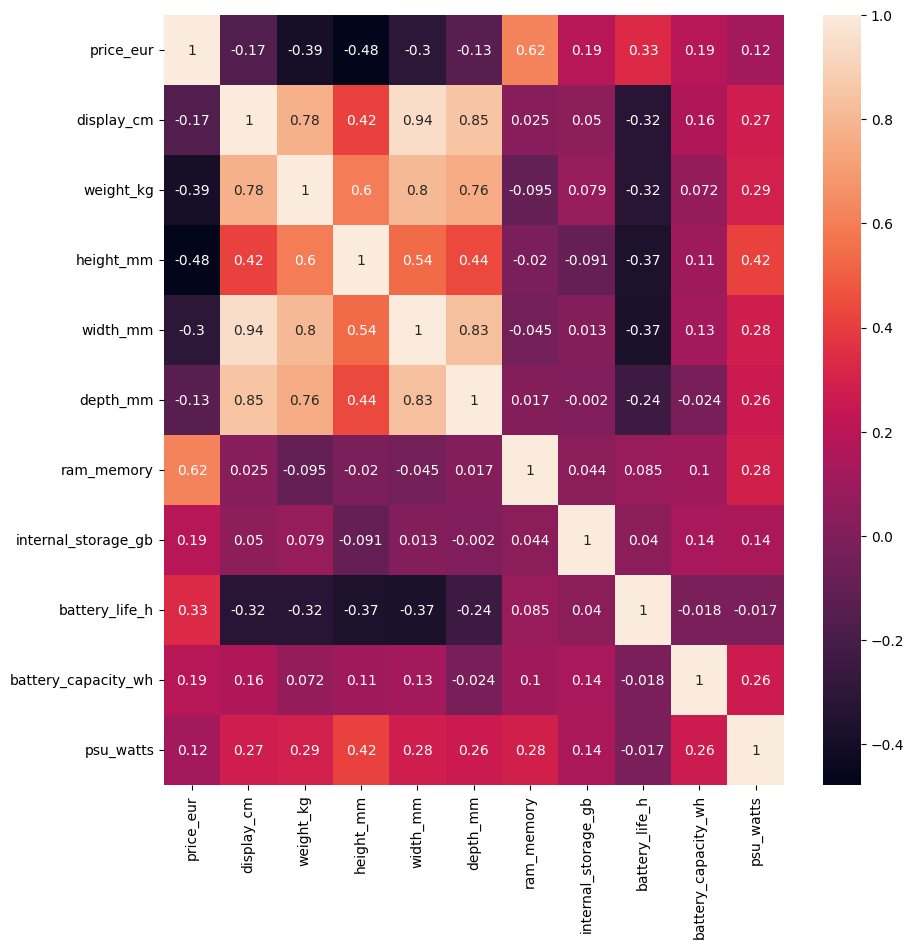

In [ ]:
#@title _ {display-mode:"form"}
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# 3. X и y. Train и Test

Наиболее подходящая целевая метка для регрессии - price_eur (цена ноутбука). Будем обучать модель предсказывать цену ноутбука на основе его характеристик.

Для начала откинем столбец name. В этой задаче название ноутбука является незначимым признаком

In [ ]:
df_11 = df_10.drop(['name'], axis=1)

Закодируем категориальные признаки

In [ ]:
df_12 = pd.get_dummies(df_11)

Отделим целевую метку

In [ ]:
X = df_12.drop(['price_eur'], axis=1) # X - все столбцы, кроме цены
y = df_12['price_eur'] # y - столбец с ценой

Разобьем на обучающую и тестовую выборки.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#@title _ {display-mode:"form"}
print(f'''
X_train: {X_train.shape}
y_train: {y_train.shape}
X_test: {X_test.shape}
y_test: {y_test.shape}
''')


X_train: (322, 77)
y_train: (322,)
X_test: (81, 77)
y_test: (81,)



# 4. Обучение модели

Обучим нашу модель

In [ ]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

Оценим нашу модель

Mean Squared Error (MSE): 78983.22704298752
Variance Score: 0.7950980795675622
Max Error: 975.6267396290409


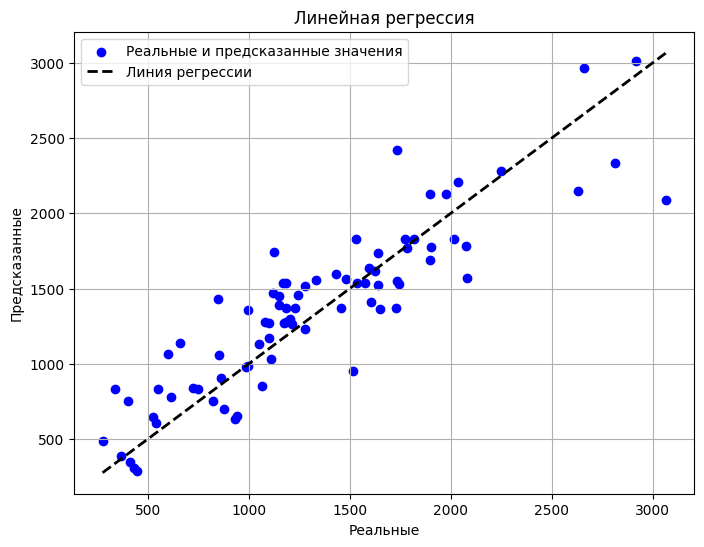

In [ ]:
#@title _ {display-mode:"form"}
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, explained_variance_score, max_error

predictions = model_1.predict(X_test)

mse = mean_squared_error(y_test, predictions)  # Среднеквадратическая ошибка
variance_score = explained_variance_score(y_test, predictions)  # Коэффициент детерминации (explained variance score)
max_err = max_error(y_test, predictions)  # Максимальная ошибка

print(f"Mean Squared Error (MSE): {mse}")
print(f"Variance Score: {variance_score}")
print(f"Max Error: {max_err}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Реальные и предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Линия регрессии')
plt.title('Линейная регрессия')
plt.xlabel('Реальные')
plt.ylabel('Предсказанные')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_1.score(X_test, y_test)

0.7896721685939508

Неплохой показатель, попробуем улучшить результат

Попробуем другую модель - RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor()
model_2.fit(X_train, y_train)

RandomForestRegressor()

Mean Squared Error (MSE): 63413.9762529584
Variance Score: 0.8315533380301705
Max Error: 813.4967999999992


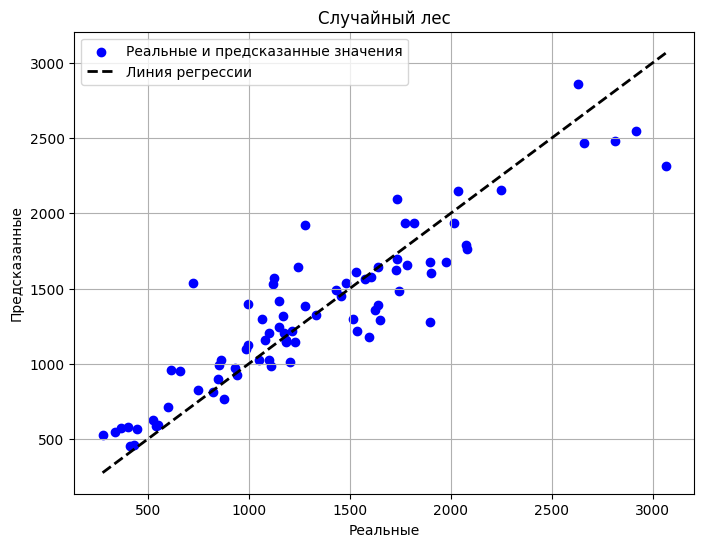

In [ ]:
#@title _ {display-mode:"form"}
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, explained_variance_score, max_error

predictions = model_2.predict(X_test)

mse = mean_squared_error(y_test, predictions)  # Среднеквадратическая ошибка
variance_score = explained_variance_score(y_test, predictions)  # Коэффициент детерминации (explained variance score)
max_err = max_error(y_test, predictions)  # Максимальная ошибка

print(f"Mean Squared Error (MSE): {mse}")
print(f"Variance Score: {variance_score}")
print(f"Max Error: {max_err}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Реальные и предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Линия регрессии')
plt.title('Случайный лес')
plt.xlabel('Реальные')
plt.ylabel('Предсказанные')
plt.legend()
plt.grid(True)
plt.show()

Случайный лес справился лучше

# Использование модели

In [ ]:
#@title Предсказание цены ноутбука {display-mode:"form"}
display_cm = 40 # @param {type:"slider", min:30, max:40, step:0.1}
weight_kg = 2.2 # @param {type:"slider", min:1, max:2.2, step:0.1}
height_mm = 22.5 # @param {type:"slider", min:12.5, max:22.5, step:0.1}
width_mm = 400 # @param {type:"slider", min:280, max:400, step:0.1}
depth_mm = 260 # @param {type:"slider", min:200, max:260, step:0.1}
ram_memory = 4 # @param {type:"slider", min:4, max:32, step:4}
internal_storage_gb = 513 # @param {type:"slider", min:0, max:2000, step:1}
battery_life_h = 5 # @param {type:"slider", min:5, max:20, step:1}
battery_capacity_wh = 50 # @param {type:"slider", min:40, max:70, step:1}
psu_watts = 51 # @param {type:"slider", min:40, max:70, step:1}
cpu_processor = "i3-10110U" # @param ["3250U", "468", "4680U", "4980U", "5500U", "5675U", "5875U", "6405U", "7320U", "8CX", "AMD SoC", "Intel HM570", "Intel SoC", "M1", "M1 Pro", "M2", "M2 Pro", "MT8183", "MediaTek", "N100", "N200", "N4120", "N4500", "N5030", "N5100", "N6000", "i3-10110U", "i3-1115G4", "i3-1215U", "i3-1315U", "i3-N305", "i5-10210Y", "i5-10310U", "i5-11300H", "i5-1135G7", "i5-1145G7", "i5-1155G7", "i5-1235U", "i5-1240P", "i5-1245U", "i5-1335U", "i5-1340P", "i7-11370H", "i7-1165G7", "i7-1185G7", "i7-1195G7", "i7-1255U", "i7-1260P", "i7-1265U", "i7-1355U", "i7-1360P", "i7-1365U", "i7-1370P"]
gpu_integrated = "Intel Iris Xe Graphics" # @param ["AMD Radeon", "AMD Radeon 610M", "AMD Radeon 660M", "AMD Radeon 680M", "AMD Radeon 780M", "AMD Radeon Graphics", "ARM Mali-G72 MP3", "Adreno 690", "Apple GPU", "Intel Iris Xe Graphics", "Intel\xAE UHD Graphics", "Intel\xAE UHD Graphics 600", "Intel\xAE UHD Graphics 605", "Qualcomm Adreno 618"]

X = pd.DataFrame([[display_cm, weight_kg, height_mm, width_mm, depth_mm, ram_memory, internal_storage_gb, battery_life_h, battery_capacity_wh, psu_watts, cpu_processor, gpu_integrated]], columns=[
    'display_cm', 'weight_kg', 'height_mm', 'width_mm', 'depth_mm',
    'ram_memory', 'internal_storage_gb', 'battery_life_h',
    'battery_capacity_wh', 'psu_watts', 'cpu_processor', 'gpu_integrated'])

model_columns = ['display_cm', 'weight_kg', 'height_mm', 'width_mm', 'depth_mm',
       'ram_memory', 'internal_storage_gb', 'battery_life_h',
       'battery_capacity_wh', 'psu_watts', 'cpu_processor_3250U',
       'cpu_processor_468', 'cpu_processor_4680U', 'cpu_processor_4980U',
       'cpu_processor_5500U', 'cpu_processor_5675U', 'cpu_processor_5875U',
       'cpu_processor_6405U', 'cpu_processor_7320U', 'cpu_processor_8CX',
       'cpu_processor_AMD SoC', 'cpu_processor_Intel HM570',
       'cpu_processor_Intel SoC', 'cpu_processor_M1', 'cpu_processor_M1 Pro',
       'cpu_processor_M2', 'cpu_processor_M2 Pro', 'cpu_processor_MT8183',
       'cpu_processor_MediaTek', 'cpu_processor_N100', 'cpu_processor_N200',
       'cpu_processor_N4120', 'cpu_processor_N4500', 'cpu_processor_N5030',
       'cpu_processor_N5100', 'cpu_processor_N6000', 'cpu_processor_i3-10110U',
       'cpu_processor_i3-1115G4', 'cpu_processor_i3-1215U',
       'cpu_processor_i3-1315U', 'cpu_processor_i3-N305',
       'cpu_processor_i5-10210Y', 'cpu_processor_i5-10310U',
       'cpu_processor_i5-11300H', 'cpu_processor_i5-1135G7',
       'cpu_processor_i5-1145G7', 'cpu_processor_i5-1155G7',
       'cpu_processor_i5-1235U', 'cpu_processor_i5-1240P',
       'cpu_processor_i5-1245U', 'cpu_processor_i5-1335U',
       'cpu_processor_i5-1340P', 'cpu_processor_i7-11370H',
       'cpu_processor_i7-1165G7', 'cpu_processor_i7-1185G7',
       'cpu_processor_i7-1195G7', 'cpu_processor_i7-1255U',
       'cpu_processor_i7-1260P', 'cpu_processor_i7-1265U',
       'cpu_processor_i7-1355U', 'cpu_processor_i7-1360P',
       'cpu_processor_i7-1365U', 'cpu_processor_i7-1370P',
       'gpu_integrated_AMD Radeon', 'gpu_integrated_AMD Radeon 610M',
       'gpu_integrated_AMD Radeon 660M', 'gpu_integrated_AMD Radeon 680M',
       'gpu_integrated_AMD Radeon 780M', 'gpu_integrated_AMD Radeon Graphics',
       'gpu_integrated_ARM Mali-G72 MP3', 'gpu_integrated_Adreno 690',
       'gpu_integrated_Apple GPU', 'gpu_integrated_Intel Iris Xe Graphics',
       'gpu_integrated_Intel® UHD Graphics',
       'gpu_integrated_Intel® UHD Graphics 600',
       'gpu_integrated_Intel® UHD Graphics 605',
       'gpu_integrated_Qualcomm Adreno 618']

X = pd.get_dummies(X)

missing_cols = set(model_columns) - set(X.columns)
for col in missing_cols:
    X[col] = 0

X = X[model_columns]

predictions = model_2.predict(X)
print(predictions[0])

781.0712899999999
